In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(ComplexHeatmap))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Myeloid/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.annotation.Rds")
coembed

An object of class Seurat 
131519 features across 17533 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

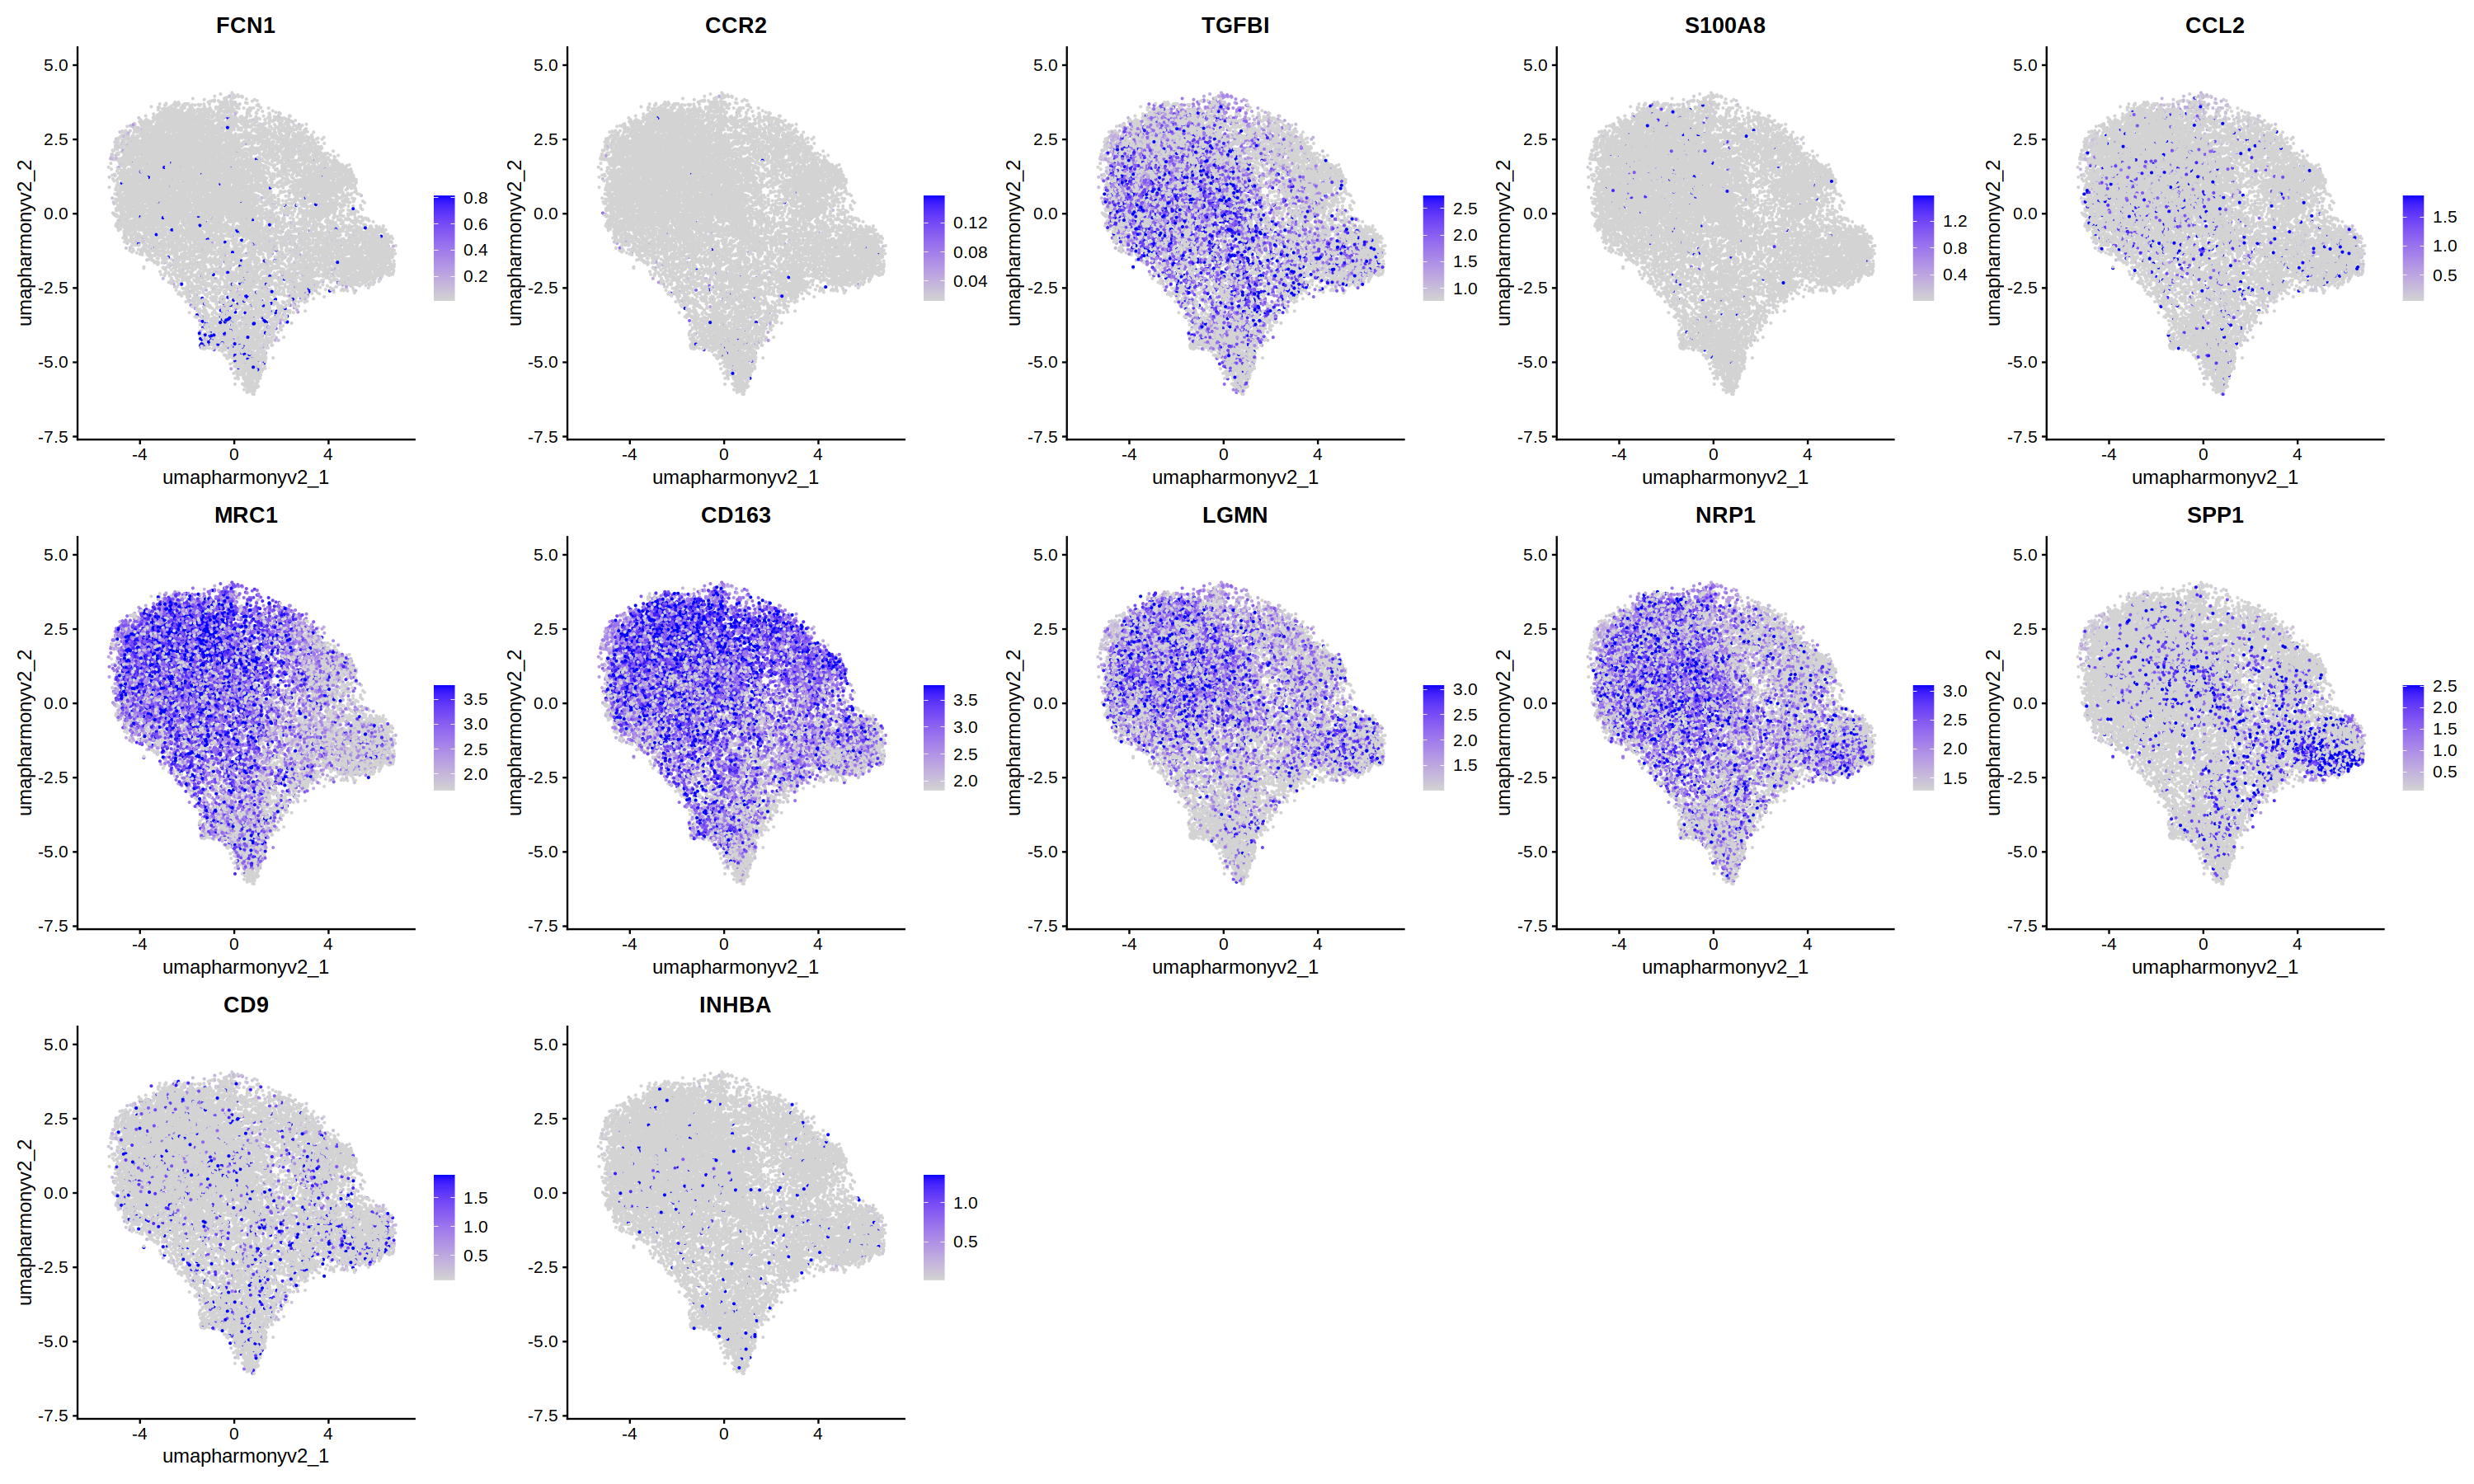

In [4]:
options(repr.plot.height = 15, repr.plot.width = 25)

FeaturePlot(coembed, reduction = "umap_harmony_v2", 
            feature = c("FCN1", "CCR2", "TGFBI",
                       "S100A8", "CCL2", "MRC1",
                       "CD163", 
                        "LGMN", "NRP1", "SPP1", "CD9", "INHBA"),
           min.cutoff = "q10", max.cutoff = "q90", ncol = 5) +
    xlab("") + ylab("")

In [16]:
## compute module score
coembed <- AddModuleScore(coembed, features = list(c("ILA", "IL1B",
                                                  "TNF", "AREG", "EREG", "CXCL2",
                                                  "CXCL3", "CXCL8", "CCL3", "CCL4")),
                         ctrl = 5, name = 'inflammatory')

coembed <- AddModuleScore(coembed, features = list(c("TGFb", "CCL18", "IL10",
                                                    "IL4")),
                         ctrl = 5, name = 'anti.inflammatory')

Warning message:
“The following features are not present in the object: ILA, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: TGFb, not searching for symbol synonyms”


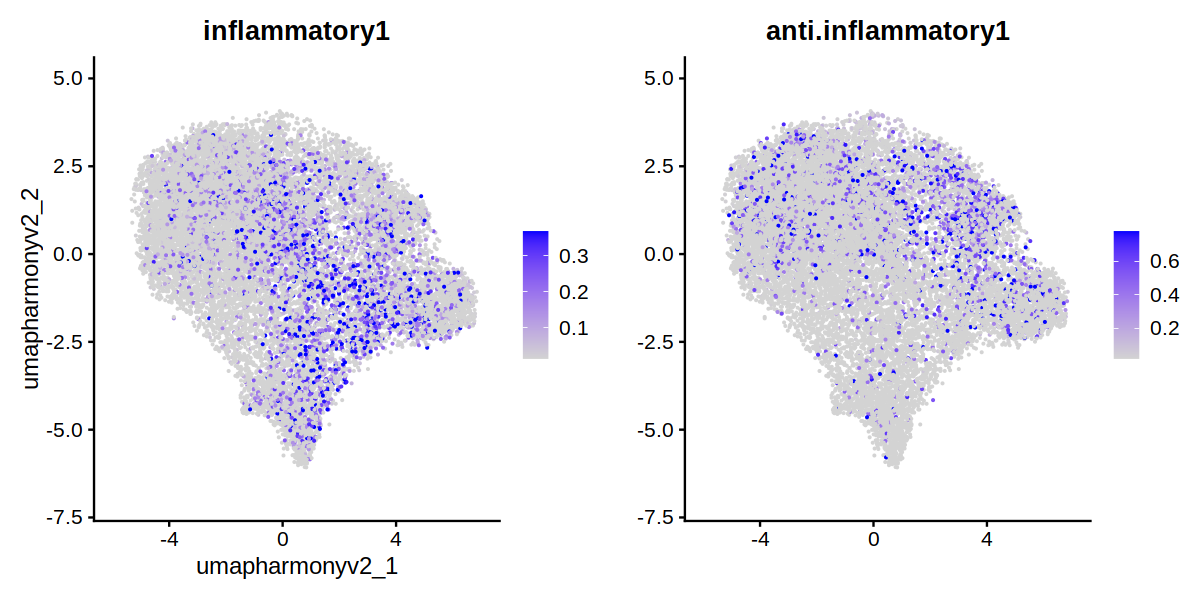

In [19]:
options(repr.plot.height = 5, repr.plot.width = 10)

FeaturePlot(coembed, reduction = "umap_harmony_v2", 
            feature = c("inflammatory1", "anti.inflammatory1") ,
           min.cutoff = "q10", max.cutoff = "q90", ncol =2,
           ) +
    xlab("") + ylab("")